In [2]:
!pip3 install torch torchvision torchaudio
!pip install "fastai >= 2"


In [3]:
import fastai
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastdownload import download_url

print(fastai.__version__)

2.5.3


In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

path = Path("/content/gdrive/My Drive/")
learn_inf = load_learner(path/'export.pkl')
learn_inf = load_learner(path/'export.pkl')

Mounted at /content/gdrive


The vocabulary is: ['nintendo', 'playstation', 'xbox']


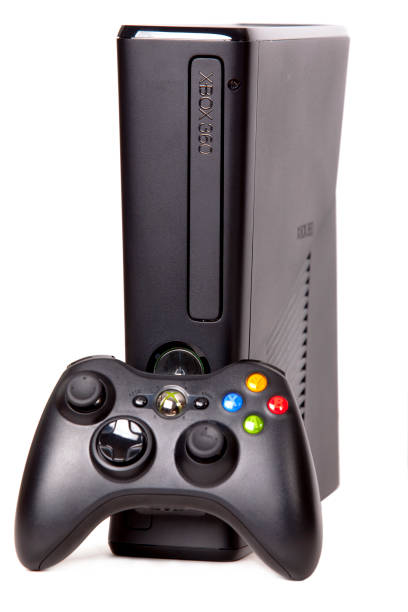

The result is: ('xbox', TensorBase(2), TensorBase([1.8391e-07, 1.0739e-06, 1.0000e+00]))


In [5]:
def test():
  img_url = "https://media.istockphoto.com/photos/microsoft-xbox-360-game-console-picture-id458999731?k=6&m=458999731&s=612x612&w=0&h=YNTdYYRh4KkJNkVxKY4cKniZYROmAX7oHYqlyuvIALs="

  dest = 'images/xbox.png'
  download_url(img_url, dest) 
  print(f"The vocabulary is: {learn_inf.dls.vocab}")
  img = PILImage.create(dest)
  display(img)
  results = learn_inf.predict('images/xbox.png')
  print(f"The result is: {results}")

test()

In [6]:
def on_click_classify(change):
    # Load image that has been uploaded
    img = PILImage.create(btn_upload.data[-1])

    # Let's clear the previous output (if any)
    out_pl.clear_output()

    # Display the image
    with out_pl: 
      display(img.to_thumb(128,128))
    
    # Calling the model
    (pred, pred_idx, probs) = learn_inf.predict(img) 

    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

# Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

btn_run = widgets.Button(description='Classify')
btn_run.on_click(on_click_classify)

lbl_pred = widgets.Label()
# lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

out_pl = widgets.Output()
out_pl.clear_output()

VBox(
    [
     widgets.Label('Select your console!'), 
     btn_upload, 
     btn_run, 
     out_pl, 
     lbl_pred
     ]
     )

In [8]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
